In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lir
import pickle as pk
from math import sin
from matplotlib import pylab
from pylab import *
import os
os.chdir("..")
os.chdir("..")

## Taking Input Mass Media

In [2]:
pkey=0
base=0
years=6
district = "allahabad"

In [ ]:
file1 = open("/Users/abhishekyadav/Documents/Study/BTP/city_to_article/Data/up/mediaDataVectors_"+district+"_big.pk",'rb')
data = pk.load(file1)
month_vector = pk.load(file1)
vocablury = pk.load(file1)
file1.close()
data = pd.Series(data[:years*12])

## Raw Data Plotting

In [ ]:
xaxis = np.arange(1,13)
year = np.arange(1,years+1)
plt.figure(figsize=(10,12))
for i in range(years):
    yaxis = np.array(data[base+i*12:base+(i+1)*12].tolist(),dtype=np.float32)
    plt.plot(xaxis,yaxis)
    plt.legend(year)
# print(data)

## Data Transformation 2

#### Trend

In [ ]:
xaxis = np.arange(0,years*12)
plt.figure(figsize=(10,12))
yaxis = np.array(data[base:].tolist(),dtype=np.float32)
plt.plot(xaxis,yaxis)

#### Detrend

In [ ]:
# use regression line method
X = [i for i in range(0, len(yaxis))]
X = np.reshape(X, (len(X), 1))
y = yaxis
model = lir()
model.fit(X, y)
# calculate trend
yaxis1 = model.predict(X)
plt.plot(X,yaxis)
plt.plot(X,yaxis1)

#### Detrend2

In [ ]:
yaxis2 = [yaxis[i]-yaxis1[i] for i in range(0,len(yaxis))]
plt.plot(xaxis,yaxis2)

#### Detrend3

In [ ]:
yaxis3=[]
for i in range(len(yaxis2)):
    sum1=0
    for j in range(years):
        sum1+=yaxis2[i%12+12*j]
    yaxis3.append(sum1/years)
plt.plot(xaxis,yaxis3)

#### Final

In [ ]:
noise = [yaxis[i]-yaxis1[i]-yaxis3[i] for i in range(len(yaxis))]
plt.plot(xaxis,noise)

## Anomaly Detection

In [2]:
pwd = os.getcwd( )
directory_in_str = pwd+"/Mass Media/Data/"
state = "up"
directory = directory_in_str + state
result_dir = directory_in_str + state + "_result"
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

In [3]:
def detrend(date):
    xaxis = np.arange(0,years*12)
    yaxis = np.array(data[base:],dtype=np.float32)
    X = [i for i in range(0, len(yaxis))]
    X = np.reshape(X, (len(X), 1))
    y = yaxis
    model = lir()
    model.fit(X, y)
    yaxis1 = model.predict(X)
    yaxis2 = [yaxis[i]-yaxis1[i] for i in range(0,len(yaxis))]
    yaxis3=[]
    for i in range(len(yaxis2)):
        sum1=0
        for j in range(years):
            sum1+=yaxis2[i%12+12*j]
        yaxis3.append(sum1/years)
    noise = [yaxis[i]-yaxis1[i]-yaxis3[i] for i in range(len(yaxis))]
    return noise
    
def peakdet(v, thresh):
    maxthresh = []
    minthresh = []
    peaks = []
    valleys = []

    for x, y in v:
        if y > thresh:
            maxthresh.append((x, y))
        elif y < -thresh:
            minthresh.append((x, y))

    for x, y in maxthresh:
        try:
            if (v[x - 1][1] < y) & (v[x + 1][1] < y):
                peaks.append((x, y))
        except Exception:
            pass

    for x, y in minthresh:
        try:
            if (v[x - 1][1] > y) & (v[x + 1][1] > y):
                valleys.append((x, y))
        except Exception:
            pass

    return peaks, valleys

/Users/abhishekyadav/Documents/Github/BTP/Mass Media/Data/up/mediaDataVectors_allahabad_big.pk
0.167162
2011-01 0 0
2011-02 1 0
2011-03 2 1
2011-04 3 1
2011-05 4 0
2011-06 5 0
2011-07 6 0
2011-08 7 1
2011-09 8 0
2011-10 9 1
2011-11 10 0
2011-12 11 0
2012-01 12 1
2012-02 13 0
2012-03 14 0
2012-04 15 0
2012-05 16 1
2012-06 17 0
2012-07 18 0
2012-08 19 1
2012-09 20 0
2012-10 21 1
2012-11 22 1
2012-12 23 0
2013-01 24 0
2013-02 25 1
2013-03 26 0
2013-04 27 0
2013-05 28 0
2013-06 29 0
2013-07 30 0
2013-08 31 1
2013-09 32 0
2013-10 33 0
2013-11 34 0
2013-12 35 1
2014-01 36 0
2014-02 37 1
2014-03 38 0
2014-04 39 0
2014-05 40 0
2014-06 41 0
2014-07 42 1
2014-08 43 0
2014-09 44 1
2014-10 45 0
2014-11 46 0
2014-12 47 0
2015-01 48 1
2015-02 49 0
2015-03 50 1
2015-04 51 1
2015-05 52 1
2015-06 53 1
2015-07 54 0
2015-08 55 0
2015-09 56 1
2015-10 57 0
2015-11 58 1
2015-12 59 0
2016-01 60 0
2016-02 61 0
2016-03 62 0
2016-04 63 1
2016-05 64 0
2016-06 65 0
2016-07 66 0
2016-08 67 0
2016-09 68 0
2016-10 6

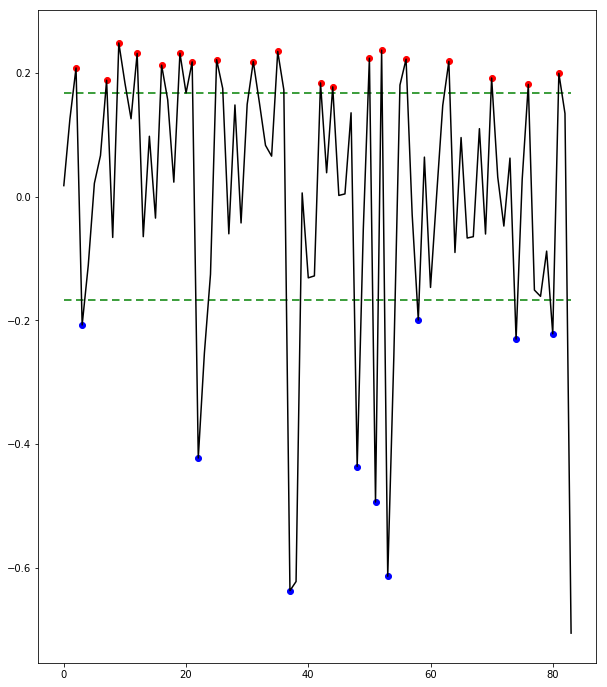

/Users/abhishekyadav/Documents/Github/BTP/Mass Media/Data/up/mediaDataVectors_meerut_big.pk
0.19044156
2011-01 0 1
2011-02 1 0
2011-03 2 0
2011-04 3 0
2011-05 4 0
2011-06 5 0
2011-07 6 1
2011-08 7 1
2011-09 8 0
2011-10 9 1
2011-11 10 0
2011-12 11 1
2012-01 12 0
2012-02 13 0
2012-03 14 1
2012-04 15 0
2012-05 16 1
2012-06 17 0
2012-07 18 0
2012-08 19 0
2012-09 20 1
2012-10 21 0
2012-11 22 0
2012-12 23 1
2013-01 24 1
2013-02 25 0
2013-03 26 0
2013-04 27 1
2013-05 28 0
2013-06 29 0
2013-07 30 0
2013-08 31 1
2013-09 32 0
2013-10 33 0
2013-11 34 0
2013-12 35 1
2014-01 36 0
2014-02 37 1
2014-03 38 1
2014-04 39 1
2014-05 40 0
2014-06 41 1
2014-07 42 1
2014-08 43 1
2014-09 44 1
2014-10 45 0
2014-11 46 1
2014-12 47 0
2015-01 48 1
2015-02 49 0
2015-03 50 0
2015-04 51 0
2015-05 52 0
2015-06 53 0
2015-07 54 1
2015-08 55 0
2015-09 56 1
2015-10 57 1
2015-11 58 0
2015-12 59 0
2016-01 60 0
2016-02 61 0
2016-03 62 0
2016-04 63 0
2016-05 64 0
2016-06 65 0
2016-07 66 0
2016-08 67 0
2016-09 68 1
2016-10 69

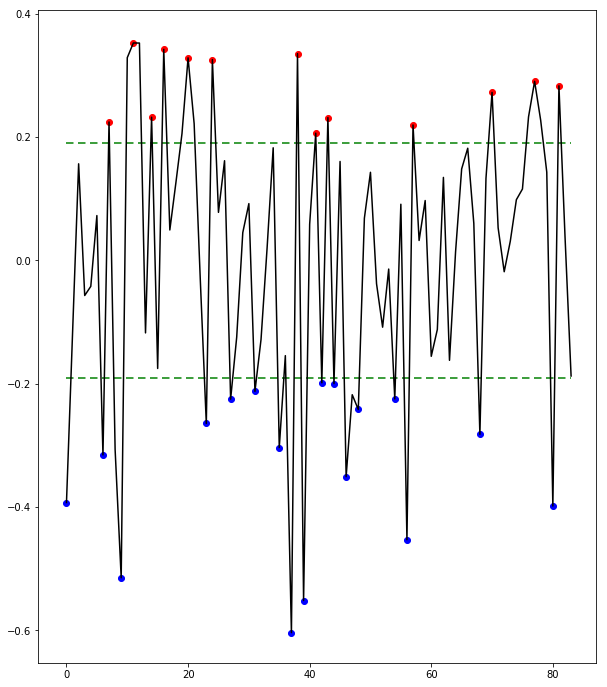

/Users/abhishekyadav/Documents/Github/BTP/Mass Media/Data/up/mediaDataVectors_lucknow_big.pk
0.1253154
2011-01 0 1
2011-02 1 0
2011-03 2 1
2011-04 3 0
2011-05 4 1
2011-06 5 1
2011-07 6 0
2011-08 7 0
2011-09 8 0
2011-10 9 0
2011-11 10 1
2011-12 11 0
2012-01 12 0
2012-02 13 0
2012-03 14 0
2012-04 15 0
2012-05 16 0
2012-06 17 0
2012-07 18 0
2012-08 19 1
2012-09 20 0
2012-10 21 0
2012-11 22 1
2012-12 23 0
2013-01 24 0
2013-02 25 1
2013-03 26 0
2013-04 27 1
2013-05 28 0
2013-06 29 0
2013-07 30 1
2013-08 31 0
2013-09 32 1
2013-10 33 0
2013-11 34 0
2013-12 35 0
2014-01 36 1
2014-02 37 1
2014-03 38 0
2014-04 39 0
2014-05 40 0
2014-06 41 1
2014-07 42 0
2014-08 43 0
2014-09 44 0
2014-10 45 0
2014-11 46 0
2014-12 47 0
2015-01 48 0
2015-02 49 1
2015-03 50 0
2015-04 51 0
2015-05 52 0
2015-06 53 1
2015-07 54 0
2015-08 55 0
2015-09 56 0
2015-10 57 0
2015-11 58 0
2015-12 59 1
2016-01 60 0
2016-02 61 0
2016-03 62 0
2016-04 63 1
2016-05 64 0
2016-06 65 1
2016-07 66 0
2016-08 67 0
2016-09 68 0
2016-10 69

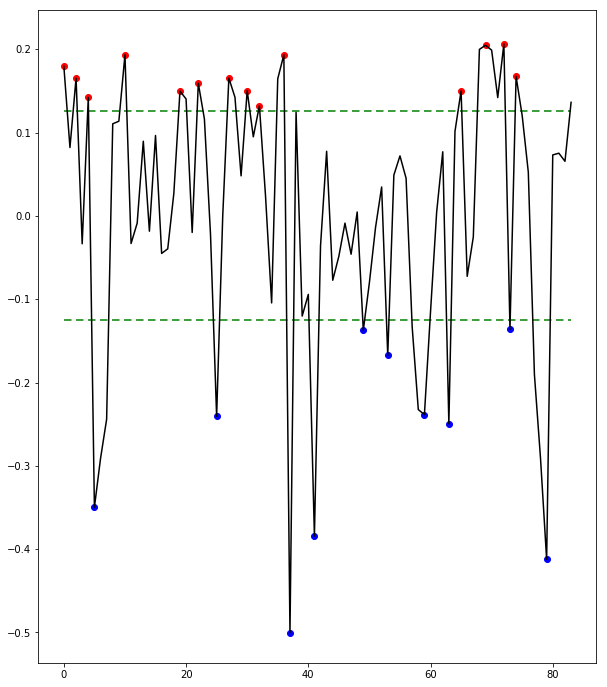

/Users/abhishekyadav/Documents/Github/BTP/Mass Media/Data/up/mediaDataVectors_varanasi_big.pk
0.20388238
2011-01 0 0
2011-02 1 1
2011-03 2 0
2011-04 3 1
2011-05 4 0
2011-06 5 1
2011-07 6 1
2011-08 7 1
2011-09 8 1
2011-10 9 0
2011-11 10 0
2011-12 11 0
2012-01 12 1
2012-02 13 0
2012-03 14 1
2012-04 15 1
2012-05 16 1
2012-06 17 0
2012-07 18 0
2012-08 19 0
2012-09 20 1
2012-10 21 0
2012-11 22 0
2012-12 23 1
2013-01 24 0
2013-02 25 0
2013-03 26 0
2013-04 27 1
2013-05 28 0
2013-06 29 0
2013-07 30 0
2013-08 31 0
2013-09 32 0
2013-10 33 0
2013-11 34 1
2013-12 35 0
2014-01 36 1
2014-02 37 0
2014-03 38 1
2014-04 39 0
2014-05 40 0
2014-06 41 0
2014-07 42 1
2014-08 43 0
2014-09 44 1
2014-10 45 0
2014-11 46 1
2014-12 47 0
2015-01 48 0
2015-02 49 0
2015-03 50 0
2015-04 51 1
2015-05 52 0
2015-06 53 0
2015-07 54 1
2015-08 55 1
2015-09 56 1
2015-10 57 0
2015-11 58 0
2015-12 59 0
2016-01 60 1
2016-02 61 1
2016-03 62 0
2016-04 63 0
2016-05 64 0
2016-06 65 1
2016-07 66 0
2016-08 67 0
2016-09 68 0
2016-10 

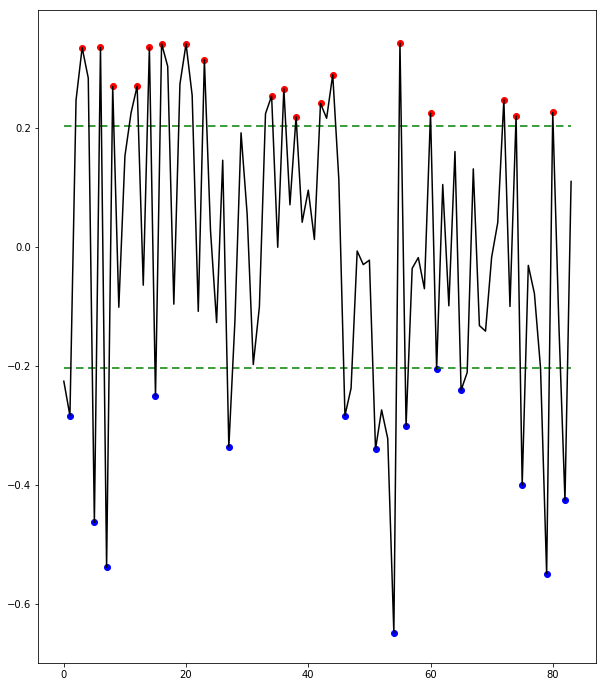

/Users/abhishekyadav/Documents/Github/BTP/Mass Media/Data/up/mediaDataVectors_agra_big.pk
0.22685897
2011-01 0 1
2011-02 1 1
2011-03 2 0
2011-04 3 0
2011-05 4 0
2011-06 5 1
2011-07 6 0
2011-08 7 0
2011-09 8 1
2011-10 9 1
2011-11 10 0
2011-12 11 0
2012-01 12 1
2012-02 13 0
2012-03 14 0
2012-04 15 1
2012-05 16 1
2012-06 17 0
2012-07 18 0
2012-08 19 1
2012-09 20 1
2012-10 21 0
2012-11 22 0
2012-12 23 0
2013-01 24 1
2013-02 25 1
2013-03 26 0
2013-04 27 0
2013-05 28 1
2013-06 29 0
2013-07 30 1
2013-08 31 0
2013-09 32 0
2013-10 33 1
2013-11 34 0
2013-12 35 0
2014-01 36 0
2014-02 37 1
2014-03 38 0
2014-04 39 1
2014-05 40 1
2014-06 41 0
2014-07 42 0
2014-08 43 0
2014-09 44 0
2014-10 45 0
2014-11 46 1
2014-12 47 0
2015-01 48 0
2015-02 49 0
2015-03 50 0
2015-04 51 1
2015-05 52 1
2015-06 53 1
2015-07 54 0
2015-08 55 0
2015-09 56 0
2015-10 57 1
2015-11 58 0
2015-12 59 1
2016-01 60 0
2016-02 61 0
2016-03 62 1
2016-04 63 0
2016-05 64 0
2016-06 65 1
2016-07 66 0
2016-08 67 0
2016-09 68 0
2016-10 69 0

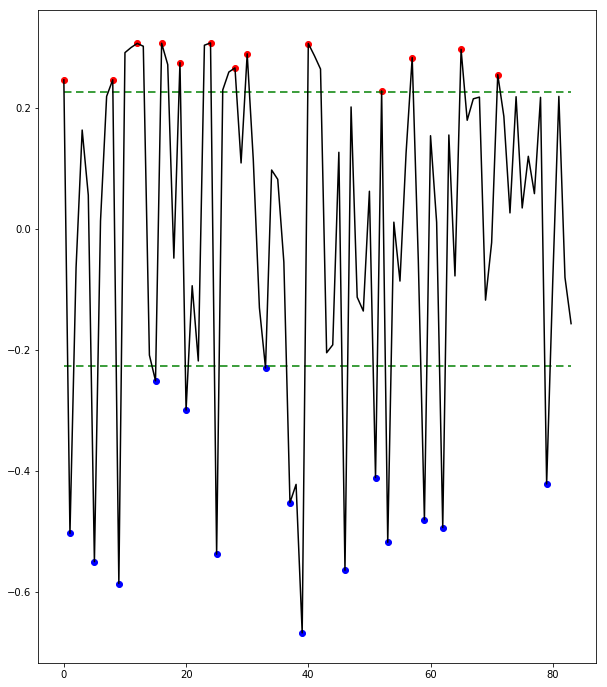

In [4]:
for filename in os.listdir(directory):
    if not(filename.endswith("big.pk")):
        continue
    
    pkey=0
    base=0
    years=7
    plt.figure(figsize=(10,12))
    print(directory + "/" + filename)
    
    file1 = open(directory + "/" + filename,'rb')
    data = pk.load(file1)
    month_vector = pk.load(file1)
    vocablury = pk.load(file1)
    file1.close()
    
    data = pd.Series(data[:years*12])
    mean = np.mean(data)
    xaxis = np.arange(0,years*12)
    
    for i in range(len(xaxis)):
        if(math.isnan(data[i])):
            data[i] = mean
    
#     data = detrend(data)
    
    yaxis = np.array(data[base:],dtype=np.float32)
    yaxis = yaxis - np.mean(yaxis)
#     plt.plot(xaxis,yaxis)

    arr = [(xaxis[i], yaxis[i]) for i in range(len(xaxis))]  # create a list of tuples where the tuples represent the (x, y) values of the function
    thresh = np.mean(abs(yaxis))
    print(thresh)

    peaks, valleys = peakdet(arr, thresh)
    anomalies = np.zeros(years*12, dtype=np.int32)
    for x, y in peaks:
        anomalies[x] = 1
    for x,y in valleys:
        anomalies[x] = 1
    i = 0
    final_vector = {}
    for key in sorted(month_vector.keys()):
        if(i >= len(anomalies)):
            break
        if(anomalies[i]==1):
            final_vector[key] = month_vector[key]
#         print(key, i, anomalies[i])
        i+=1
    
    print(len(final_vector))
    for key in sorted(final_vector.keys()):
        print(key)
        
    file1 = open(result_dir + "/" + filename,'wb')
    pk.dump(final_vector, file1)
    pk.dump(vocablury, file1)
    file1.close()

    scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
    scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
    plot(xaxis, len(xaxis) * [thresh], color='green', linestyle='--', dashes=(5, 3))
    plot(xaxis, len(xaxis) * [-thresh], color='green', linestyle='--', dashes=(5, 3))
    plot(xaxis, yaxis, 'k')
    show()
    

## Transformed Data Plotting

In [ ]:
xaxis = np.arange(1,13)
year = np.arange(1,years+1)
plt.figure(figsize=(10,12))
for i in range(years):
    yaxis = np.array(noise[i*12:(i+1)*12],dtype=np.float32)
#     print(yaxis)
    plt.plot(xaxis,yaxis)
    plt.legend(year)

In [ ]:
xaxis = np.arange(0,years*12)
yaxis = noise
mean = np.mean(yaxis)
yaxis = yaxis - mean

arr = [(xaxis[i], yaxis[i]) for i in range(len(xaxis))]  # create a list of tuples where the tuples represent the (x, y) values of the function
thresh = np.mean(abs(yaxis))

peaks, valleys = peakdet(arr, thresh)

scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
plot(xaxis, len(xaxis) * [thresh], color='green', linestyle='--', dashes=(5, 3))
plot(xaxis, len(xaxis) * [-thresh], color='green', linestyle='--', dashes=(5, 3))
plot(xaxis, yaxis, 'k')
show()

# Using Satellite Method

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lir
import pickle as pk
import scikit_posthocs as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as lir
import pickle as pk
from math import sin
from matplotlib import pylab
from pylab import *
import os
import os
os.chdir("..")
os.chdir("..")

In [2]:
pwd = os.getcwd( )
# raw_data_path = '/mnt/c/Users/Abhinav/Documents/Semester_7/BTP - 1/Avg_NL_Dist_cf_cvg.csv'
# districts_path = '/mnt/c/Users/Abhinav/Documents/Semester_7/BTP - 1/Data/districts.csv'
district = "agra"
years = 7
Isoutput = False
file1 = open(pwd+"/Mass Media/Data/up/mediaDataVectors_"+district+"_big.pk",'rb')
data = pk.load(file1)
month_vector = pk.load(file1)
vocablury = pk.load(file1)
file1.close()
data = np.array(data[:years*12], dtype=np.float64)

In [3]:
# df = pd.read_csv(raw_data_path,header=None)
# df = df.T
# data = 0
# def take(x):
#     global data
#     data = x
# df.apply(lambda x: take(x) if x[74]==district else x)
# data = data.reindex()
# data = data[1:len(data)-3]
# xaxis = np.arange(4,years*12+4)
# data = np.array(data, dtype=np.float64)

In [4]:
def getSpikeDates(temp):
    arr = []
    for i in temp:
        mm = (i)%12 + 1
        yy = 11 + int(i/12)
#         if (i%12) >= 12:
#             yy += 1
        if mm < 10:
            arr.append("20"+str(yy)+"-0"+str(mm))
        else:
            arr.append("20"+str(yy)+"-"+str(mm))
    return arr
    
def getAnnualDates(temp, month):
    arr = []
    for i in temp:
        mm = (month)%12 + 1
        yy = 11 + i
#         if (month%12)+2 >= 12:
#             yy += 1
        if mm < 10:
            arr.append("20"+str(yy)+"-0"+str(mm))
        else:
            arr.append("20"+str(yy)+"-"+str(mm))
    return arr

def intersection(a1, a2):
    a3 = []
    for x in a1:
        if x in a2:
            a3.append(x)
    return sorted(a3, key=lambda x: (int(x.split('-')[1]), int(x.split('-')[0])))

# MAD
def outliers_modified_z_score(ys, threshold):
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    new1 = np.where(np.abs(modified_z_scores) > threshold)
    return new1[0]

# IQR
def outliers_iqr(noise, temp1):
    # obj = sp.outliers_gesd(noise, outliers = 20, report = True, alpha = 0.02)
    obj = sp.outliers_iqr(noise, coef=temp1) #return_ = 'outliers', 
    z = 0
    arr = []
    for i in range(len(noise)):
        if(z < len(obj) and obj[z] == noise[i]):
            z += 1
        else:
            arr.append(i)
    return arr

#peak and valley
def detrend(date):
    xaxis = np.arange(0,years*12)
    yaxis = np.array(data[base:],dtype=np.float32)
    X = [i for i in range(0, len(yaxis))]
    X = np.reshape(X, (len(X), 1))
    y = yaxis
    model = lir()
    model.fit(X, y)
    yaxis1 = model.predict(X)
    yaxis2 = [yaxis[i]-yaxis1[i] for i in range(0,len(yaxis))]
    yaxis3=[]
    for i in range(len(yaxis2)):
        sum1=0
        for j in range(years):
            sum1+=yaxis2[i%12+12*j]
        yaxis3.append(sum1/years)
    noise = [yaxis[i]-yaxis1[i]-yaxis3[i] for i in range(len(yaxis))]
    return noise

def peakdet(v, thresh):
    maxthresh = []
    minthresh = []
    peaks = []
    valleys = []

    for x, y in v:
        if y > thresh:
            maxthresh.append((x, y))
        elif y < -thresh:
            minthresh.append((x, y))

    for x, y in maxthresh:
        try:
            if (v[x - 1][1] < y) & (v[x + 1][1] < y):
                peaks.append((x, y))
        except Exception:
            pass

    for x, y in minthresh:
        try:
            if (v[x - 1][1] > y) & (v[x + 1][1] > y):
                valleys.append((x, y))
        except Exception:
            pass

    return peaks, valleys

def outliers_peak_score(data, thresh):
    pkey=0
    base=0
#     plt.figure(figsize=(10,12))
    
    data = pd.Series(data[:years*12])
    mean = np.mean(data)
    xaxis = np.arange(0,years*12)
    
    for i in range(len(xaxis)):
        if(math.isnan(data[i])):
            data[i] = mean
    
#     data = detrend(data)
    
    yaxis = np.array(data[base:],dtype=np.float32)
    yaxis = yaxis - np.mean(yaxis)
#     plt.plot(xaxis,yaxis)

    arr = [(xaxis[i], yaxis[i]) for i in range(len(xaxis))]  # create a list of tuples where the tuples represent the (x, y) values of the function
#     thresh = np.mean(abs(yaxis))
#     print(thresh)
    peaks, valleys = peakdet(arr, thresh)
    anomalies = np.zeros(years*12, dtype=np.int32)
    for x, y in peaks:
        anomalies[x] = 1
    for x,y in valleys:
        anomalies[x] = 1
#     print(anomalies)
    res = []
    for i in range(len(anomalies)):
        if anomalies[i] == 1:
            res.append(i)

#     scatter([x for x, y in peaks], [y for x, y in peaks], color = 'red')
#     scatter([x for x, y in valleys], [y for x, y in valleys], color = 'blue')
#     plot(xaxis, len(xaxis) * [thresh], color='green', linestyle='--', dashes=(5, 3))
#     plot(xaxis, len(xaxis) * [-thresh], color='green', linestyle='--', dashes=(5, 3))
#     plot(xaxis, yaxis, 'k')
#     show()
    
    return res

# Z_SCORE
def outliers_z_score(noise, influence, threshold):
    values = noise
    anomaly = np.zeros((12,years))
    curmean = 0.0
    curdev = 0.0
    newel = 0.0
    mean_for = []
    mean_back = []
    std_for = []
    std_back = []
    thresh = []
    abs_val = []
    curlen = 1
    win = 12

    mean_for.append(values[0])
    std_for.append(0.0)
    for i in range(1,len(values)):
        if abs(values[i]-curmean)>curdev*threshold:
            newel = influence*values[i]+(1-influence)*values[(i-1)]
        else:
            newel = values[i]
        sum1 = newel
        for j in range(max(0,i-win+1),i):
            sum1 += values[j]
        temp_mean = sum1/(min(win, i+1))
        sum1 = (newel - temp_mean)**2
        for j in range(max(0,i-win+1),i):
            sum1 += (values[j] - temp_mean)**2
        temp_std = math.sqrt(sum1/(min(win, i+1)))
        curmean = temp_mean
        curdev = temp_std
        mean_for.append(temp_mean)
        std_for.append(temp_std)

    mean_back.append(values[len(values)-1])
    std_back.append(0.0)
    curmean=0.0
    curdev=0.0
    for i in range(len(values)-2,-1,-1):
        if abs(values[i]-curmean)>curdev*threshold:
            newel = influence*values[i]+(1-influence)*values[(i+1)]
        else:
            newel = values[i]
        sum1 = newel
        for j in range(i+1,min(len(values),i+win)):
            sum1 += values[j]
        temp_mean = sum1/(min(win, len(values)-i))
        sum1 = (newel - temp_mean)**2
        for j in range(i+1,min(len(values),i+win)):
            sum1 += (values[j] - temp_mean)**2
        temp_std = math.sqrt(sum1/(min(win, len(values)-i)))
        curmean = temp_mean
        curdev = temp_std
        mean_back.append(temp_mean)
        std_back.append(temp_std)

    avg_mean = [mean_for[i]/2 + mean_back[len(values)-1-i]/2 for i in range(0,len(values))]
    avg_std = [std_for[i]/2 + std_back[len(values)-1-i]/2 for i in range(0,len(values))]

    for i in range(0,len(values)):
        thresh.append(avg_std[i]*threshold)
        abs_val.append(abs(values[i]-avg_mean[i]))
        if abs(values[i]-avg_mean[i])>avg_std[i]*threshold:
            anomaly[int(i%12)][int(i/12)]=1
    
    arr_res = []
    if(Isoutput):
        plt.figure(figsize=(10,12))
    for i in range(years):
        for j in range(12):
            if anomaly[j][i] == 1:
                tt = i*12 + j
                arr_res.append(tt)
                if(Isoutput):
                    plt.plot(tt+1, abs_val[tt], 'o', color='black')

    xaxis = np.arange(1,years*12+1)
    if(Isoutput):
        plt.plot(xaxis,list((thresh)))
        plt.plot(xaxis,list((abs_val)))
        for i in range(1,4):
            plt.axhline(y=i*np.mean(abs_val), color='r', linestyle='-')
    
    return arr_res

def find_anomalies_spike(data, noise, maxa, b1, b2, b3):
    global influence
    noise = data
    error = 0.001
    temp = []
    finalres = ["$"]

    if b1 > 0:
        low = 0.001
        high = 20.0
        while (high - low) > error:
            mid = (low+high)/2
            temp = outliers_modified_z_score(noise, mid)
            if (len(temp)) > maxa:
                low = mid
            else:
                high = mid
        finalres = getSpikeDates(temp)
    
    if b2 > 0:
        low = 0.001
        high = 20.0
        while (high - low) > error:
            mid = (low+high)/2
            temp = outliers_iqr(noise, mid)
            if (len(temp)) > maxa:
                low = mid
            else:
                high = mid
        if len(finalres) > 0 and finalres[0] == "$":
            finalres = getSpikeDates(temp)
        else:
            finalres = intersection(finalres, getSpikeDates(temp))
    
    if b3 > 0:
        low = 0.001
        high = 20.0
        while (high - low) > error:
            mid = (low+high)/2
            temp = outliers_peak_score(data, mid)
#             print(mid,len(temp))
            if (len(temp)) > maxa:
                low = mid
            else:
                high = mid
        if len(finalres) > 0 and finalres[0] == "$":
            finalres = getSpikeDates(temp)
        else:
            finalres = intersection(finalres, getSpikeDates(temp))
    
    if len(finalres) > 0 and finalres[0] == "$":
            finalres = []
    return finalres

def find_anomalies_annual(noise, maxa, b1, b2, b3):
    global influence1
    error = 0.001
    temp = []
    finalres = ["$"]

    if b1 > 0:
        low = 0.001
        high = 20.0
        while (high - low) > error:
            mid = (low+high)/2
            temp = []
            for ii in range(12):
                tempnoise = [noise[ii + j*12] for j in range(years)]
                temp += getAnnualDates(outliers_modified_z_score(tempnoise, mid), ii)
            if (len(temp)) > maxa:
                low = mid
            else:
                high = mid
        finalres = temp
    
    if b2 > 0:
        low = 0.001
        high = 20.0
        temp = []
        while (high - low) > error:
            mid = (low+high)/2
            temp = []
            for ii in range(12):
                tempnoise = [noise[ii + j*12] for j in range(years)]
                temp += getAnnualDates(outliers_iqr(tempnoise, mid), ii)
            if (len(temp)) > maxa:
                low = mid
            else:
                high = mid
        if len(finalres) > 0 and finalres[0] == "$":
            finalres = temp
        else:
            finalres = intersection(finalres, temp)
    
    if b3 > 0:
        low = 0.001
        high = 20.0
        while (high - low) > error:
            mid = (low+high)/2
            temp = outliers_z_score(noise, influence1, mid)
            if (len(temp)) > maxa:
                low = mid
            else:
                high = mid
        if len(finalres) > 0 and finalres[0] == "$":
            finalres = temp
        else:
            finalres = intersection(finalres, temp)
    
    if len(finalres) > 0 and finalres[0] == "$":
            finalres = []
    return finalres

## Decomposition

In [5]:
# Trend
xaxis = np.arange(4,years*12+4)
yaxis = np.array(data[0:].tolist(),dtype=np.float32)

# Detrend 1 use regression line method
X = [i for i in range(0, len(yaxis))]
X = np.reshape(X, (len(X), 1))
y = yaxis
model = lir()
model.fit(X, y)
# calculate trend
yaxis1 = model.predict(X)

# Detrend 2
yaxis2 = [yaxis[i]-yaxis1[i] for i in range(0,len(yaxis))]

# Detrend 3
yaxis3=[]
for i in range(len(yaxis2)):
    sum1=0
    for j in range(years):
        sum1+=yaxis2[i%12+12*j]
    yaxis3.append(sum1/years)

noise = [yaxis[i]-yaxis1[i]-yaxis3[i] for i in range(len(yaxis))]

if(Isoutput):
    plt.figure(figsize=(15,10))
    plt.plot(xaxis,data,marker='o', color='b')
    plt.plot(xaxis,np.array(yaxis3)+np.array(yaxis1), color='r', linestyle='--')
    # plt.plot(xaxis,np.array(yaxis31), color='g', linestyle='--')
    for j in range(int((years*12)/5)):
        plt.axvline(x=j*5,linestyle='--')
    plt.show()
    plt.figure(figsize=(15,10))
    plt.plot(0,np.min(np.array(yaxis)))
    plt.plot(0,np.max(np.array(yaxis)))
    plt.plot(xaxis,noise,marker='o', color='b')
    plt.axhline(y=0,linestyle='--',color='r')
    for j in range(int((years*12)/5)):
        plt.axvline(x=j*5,linestyle='--')

noise = np.array(noise)
noise = (noise - noise.mean(axis=0))/(noise.std(axis=0))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


## Spike Anomaly

In [6]:
max_anomalies = 20
influence = 0.2

tset = set()
res = []
for x in range(1, max_anomalies+1):
    temp = find_anomalies_spike(yaxis, noise, x, 1, 1, 1)
    tt = []
    for y in temp:
        if y not in tset:
            tset.add(y)
            tt.append(y)
    if len(tt) > 0:
        res.append(tt)

z=1
for x in res:
    for y in x:
        ss = 'Rank ' + str(z) + ': ' + y
        z += 1
        print(ss)

Rank 1: 2014-04
Rank 2: 2011-10
Rank 3: 2014-11
Rank 4: 2011-06
Rank 5: 2013-02
Rank 6: 2015-06
Rank 7: 2011-02
Rank 8: 2016-03
Rank 9: 2015-12
Rank 10: 2014-02
Rank 11: 2017-08
Rank 12: 2015-04
Rank 13: 2012-09
Rank 14: 2013-01


## Annual Anomaly

In [ ]:
max_anomalies1 = 8
influence1 = 0.2

tset = set()
res1 = []
for x in range(1, max_anomalies1+1):
    temp = find_anomalies_annual(noise, x, 1, 1, 0)
    tt = []
    for y in temp:
        if y not in tset:
            tset.add(y)
            tt.append(y)
    if len(tt) > 0:
        res1.append(tt)

z=1
for x in res1:
    for y in x:
        ss = 'Rank ' + str(z) + ': ' + y
        z += 1
        print(ss)